In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

Your task is to use RDD to estimate the effect of the following events in Quebec:

1. Confinement du 20 Mars 2020 
- Comparaison des données avec autres États ou pays qui n'ont pas appliqué de mesures?

2. Ouverture des écoles le 31 août 2020
- Comparaison du nombre de personnes atteintes du covid-19 qui ont entre environ 6 et 18 ans (ou proportion de personnes) avant et après le 31 août 2020 ?

3. Confinement du 25 décembre 2020

Information concernant le confinement du 25 décembre 2020:

 https://www.quebec.ca/nouvelles/actualites/details/une-pause-des-fetes-jusquau-10-janvier-2021-inclusivement/



Chronologie : 
- 1er octobre: Début du défi 28 jours13
- 3 décembre: Le gouvernement annonce l'interdiction de tenir des rassemblements de famille pour la période des fêtes
- 14 décembre: Début de la campagne de vaccination
- 16 décembre: Nouveau confinement du 25 décembre 2020 au 11 janvier 2021, seuls les services essentiels sont autorisés
- 9 janvier 2021: Couvre-feu à 20h jusqu'au 8 février, et report d'une semaine de l'ouverture des écoles secondaires.

Période d'analyse:

Début: 

Fin: 

Contraintes possibles : 

Impact du vaccin peut être confondu avec celui des mesures prises le 25 décembre 2020. 



Chronologie des évènements au Québec

https://fr.wikipedia.org/wiki/Chronologie_de_la_pand%C3%A9mie_de_Covid-19_au_Qu%C3%A9bec

In [ ]:
#https://github.com/ccodwg/Covid19Canada

#https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html
df = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')
#dic = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-data-dictionary.csv')

#https://resources-covid19canada.hub.arcgis.com/datasets/provincial-daily-totals
df2 = pd.read_csv('https://opendata.arcgis.com/datasets/3afa9ce11b8842cb889714611e6f3076_0.csv')

In [ ]:
df = df.loc[df.prname == 'Quebec']
df

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
29,24,Quebec,Québec,2020-03-01,NaN,1,0,0.0,1,NaN,NaN,NaN,NaN,1,100.00,0.01,0.00,0.0,0.00,NaN,NaN,100.00,1.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,24,Quebec,Québec,2020-03-03,NaN,1,0,0.0,1,NaN,NaN,NaN,NaN,0,0.00,0.01,0.00,0.0,0.00,NaN,NaN,100.00,1.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,24,Quebec,Québec,2020-03-05,NaN,2,0,0.0,2,NaN,NaN,NaN,NaN,1,100.00,0.02,0.00,0.0,0.00,NaN,NaN,100.00,2.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,24,Quebec,Québec,2020-03-06,NaN,2,0,0.0,2,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,100.00,2.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,24,Quebec,Québec,2020-03-07,NaN,2,0,0.0,2,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,100.00,2.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,24,Quebec,Québec,2021-01-13,1.0,234695,0,8814.0,234695,2620248.0,202166.0,86.14,308811.0,2071,0.89,2766.01,103.88,34.0,3.76,8692.0,2246.0,10.10,23715.0,279.49,34873.0,411.00,649.0,7.65,16696.0,196.77,326.0,3.84,2385.0,28.11,47.0,0.55
4697,24,Quebec,Québec,2021-01-14,1.0,236827,0,8876.0,236827,2629203.0,204741.0,86.45,309866.0,2132,0.91,2791.14,104.61,62.0,3.75,8955.0,2575.0,9.80,23210.0,273.54,34186.0,402.90,650.0,7.66,16309.0,192.21,315.0,3.71,2330.0,27.46,45.0,0.53
4712,24,Quebec,Québec,2021-01-15,1.0,238745,0,8938.0,238745,2637674.0,207934.0,87.09,310864.0,1918,0.81,2813.74,105.34,62.0,3.74,8471.0,3193.0,9.16,21873.0,257.79,33296.0,392.41,627.0,7.39,15639.0,184.31,332.0,3.91,2234.0,26.33,47.0,0.56
4727,24,Quebec,Québec,2021-01-16,1.0,240970,0,9005.0,240970,2647264.0,210364.0,87.30,311995.0,2225,0.93,2839.96,106.13,67.0,3.74,9590.0,2430.0,8.96,21601.0,254.58,33535.0,395.23,669.0,7.88,14737.0,173.68,358.0,4.22,2105.0,24.81,51.0,0.60


In [ ]:
df['delta'] = df.numconf.shift(periods=1)
df.delta =  df.numconf - df.delta 
df.delta.iloc[0] = 1

df['numtodays_5day'] = df['numtoday'].rolling(window=5).mean()
df['numdeaths_5day'] = df['numdeathstoday'].rolling(window=5).mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


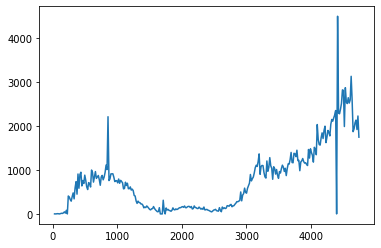

In [ ]:
df.numtoday.plot()

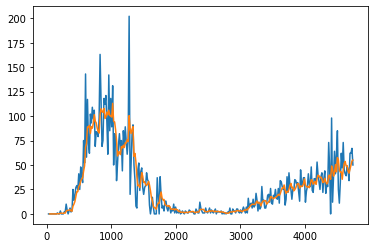

In [ ]:
#df.numdeaths.plot()
df.numdeathstoday.plot()
df.numdeaths_5day.plot()

In [ ]:
df2 = df2.loc[df2.Province == 'QUEBEC']
df2

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated
13,14,QUEBEC,QC,0,2020/01/25 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
19,20,QUEBEC,QC,0,2020/01/26 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
33,34,QUEBEC,QC,0,2020/01/27 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
46,47,QUEBEC,QC,0,2020/01/28 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62,63,QUEBEC,QC,0,2020/01/29 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,5737,QUEBEC,QC,1934,2021/01/12 12:00:00+00,232624,199920,1982,8782,45,5245397,22435,23903,-93.0,1497.0,61.0,221.0,10.0,99510.0,7058.0
5320,5752,QUEBEC,QC,2071,2021/01/13 12:00:00+00,234695,202166,2246,8815,33,5277747,32350,23695,-208.0,1516.0,19.0,229.0,8.0,107365.0,7855.0
5335,5767,QUEBEC,QC,2132,2021/01/14 12:00:00+00,236827,204741,2575,8878,63,5314149,36402,23187,-508.0,1523.0,7.0,230.0,1.0,115704.0,8339.0
5350,5782,QUEBEC,QC,1918,2021/01/15 12:00:00+00,238745,207934,3193,8938,60,5354130,39981,21856,-1331.0,1496.0,-27.0,231.0,1.0,127073.0,11369.0


In [ ]:
df2['TotalHospitalized_delta'] = df2['TotalHospitalized'].shift(periods=1)
df2['TotalHospitalized_delta'] =  df2['TotalHospitalized'] - df2['TotalHospitalized_delta']

df2['DailyTotals_5day'] = df2['DailyTotals'].rolling(window=5).mean()
df2['DailyDeaths_5day'] = df2['DailyDeaths'].rolling(window=5).mean()
df2['DailyHospitalized_5day'] = df2['DailyHospitalized'].rolling(window=5).mean()

df2.SummaryDate = pd.to_datetime(df2.SummaryDate, format='%Y-%m-%d')
df2.SummaryDate = pd.to_datetime(df2.SummaryDate.dt.strftime('%Y-%m-%d'))
df2

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated,TotalHospitalized_delta,DailyTotals_5day,DailyDeaths_5day,DailyHospitalized_5day
13,14,QUEBEC,QC,0,2020-01-25,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,QUEBEC,QC,0,2020-01-26,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,34,QUEBEC,QC,0,2020-01-27,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,47,QUEBEC,QC,0,2020-01-28,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,63,QUEBEC,QC,0,2020-01-29,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,5737,QUEBEC,QC,1934,2021-01-12,232624,199920,1982,8782,45,5245397,22435,23903,-93.0,1497.0,61.0,221.0,10.0,99510.0,7058.0,61.0,2421.2,44.0,23.4
5320,5752,QUEBEC,QC,2071,2021-01-13,234695,202166,2246,8815,33,5277747,32350,23695,-208.0,1516.0,19.0,229.0,8.0,107365.0,7855.0,19.0,2317.8,41.8,22.6
5335,5767,QUEBEC,QC,2132,2021-01-14,236827,204741,2575,8878,63,5314149,36402,23187,-508.0,1523.0,7.0,230.0,1.0,115704.0,8339.0,7.0,2118.8,46.2,26.2
5350,5782,QUEBEC,QC,1918,2021-01-15,238745,207934,3193,8938,60,5354130,39981,21856,-1331.0,1496.0,-27.0,231.0,1.0,127073.0,11369.0,-27.0,1984.8,50.4,23.2


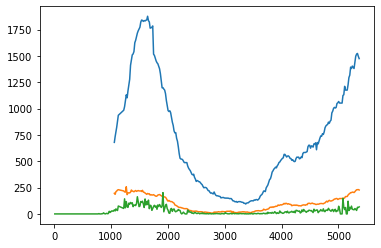

In [ ]:
#df2.DailyTotals.plot()
df2.TotalHospitalized.plot()
df2.TotalICU.plot()
df2.DailyDeaths.plot()


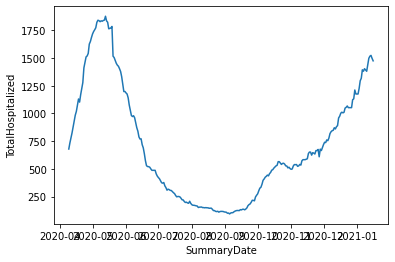

In [ ]:
g = sns.lineplot(data=df2, x='SummaryDate', y='TotalHospitalized')
#g.set_xticklabels(labels=df2.SummaryDate.dt.strftime('%Y-%m-%d'), rotation=30)